In [ ]:
from fastai.vision.all import *

/home/average-joe/mambaforge/lib/python3.9/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: libtorch_cuda_cu.so: cannot open shared object file: No such file or directory
  warn(f"Failed to load image Python extension: {e}")


In [ ]:
path = Path('/home/average-joe/coding_data/birds/birds')

In [ ]:
db = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    get_y=parent_label,
    item_tfms=Resize(224),
    batch_tfms=aug_transforms(size=128),
)

In [ ]:
dls = db.dataloaders(path, bs = 16)

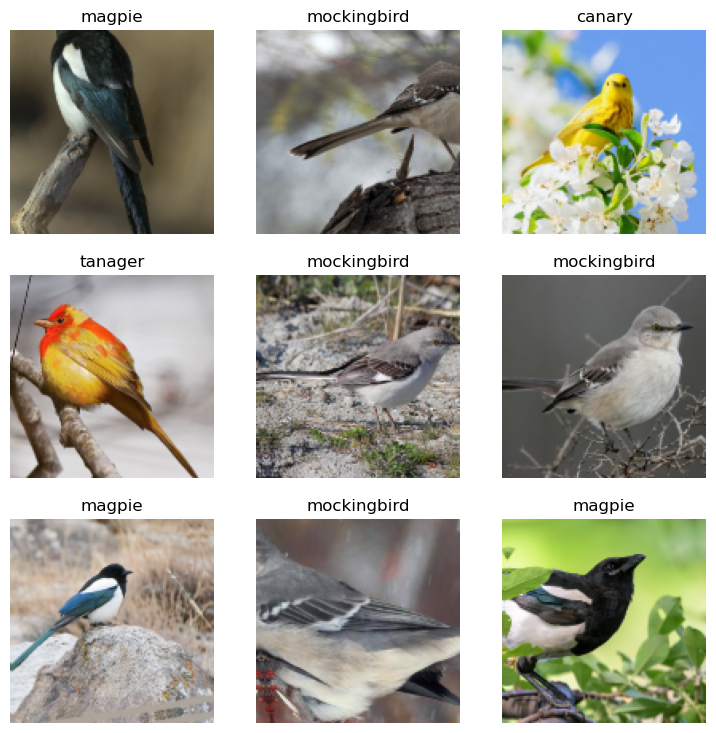

In [ ]:
b = dls.one_batch()
dls.show_batch(b=b)

In [ ]:
learn = vision_learner(dls, resnet18, metrics=[accuracy, error_rate])

/home/average-joe/mambaforge/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
/home/average-joe/mambaforge/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [ ]:
learn.fine_tune(10)

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,1.317795,0.285920,0.910995,0.089005,00:05


/home/average-joe/mambaforge/lib/python3.9/site-packages/PIL/Image.py:959: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/average-joe/mambaforge/lib/python3.9/site-packages/PIL/Image.py:959: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.541204,0.251421,0.895288,0.104712,00:04
1,0.425652,0.182556,0.931937,0.068063,00:04
2,0.380751,0.262419,0.916230,0.083770,00:04
3,0.310412,0.114044,0.952880,0.047120,00:04
4,0.330342,0.144509,0.947644,0.052356,00:04
5,0.252749,0.144570,0.963351,0.036649,00:04
6,0.181201,0.123990,0.963351,0.036649,00:04
7,0.127431,0.090484,0.958115,0.041885,00:04
8,0.116920,0.089802,0.963351,0.036649,00:04
9,0.101822,0.094931,0.963351,0.036649,00:04


/home/average-joe/mambaforge/lib/python3.9/site-packages/PIL/Image.py:959: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/average-joe/mambaforge/lib/python3.9/site-packages/PIL/Image.py:959: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/average-joe/mambaforge/lib/python3.9/site-packages/PIL/Image.py:959: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/average-joe/mambaforge/lib/python3.9/site-packages/PIL/Image.py:959: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/average-joe/mambaforge/lib/python3.9/site-packages/PIL/Image.py:959: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/average-joe/mambaforge/lib/python3

In [ ]:
learn.export('bird_classifier_resnet18_963.pkl')

In [ ]:
#from fastai.vision.widgets import *
#cleaner = ImageClassifierCleaner(learn)
#cleaner

In [ ]:
#print(cleaner.delete())
#print(cleaner.change())
#for idx in cleaner.delete(): cleaner.fns[idx].unlink()
#for idx,cat in cleaner.change(): shutil.move(str(cleaner.fns[idx], path/cat))

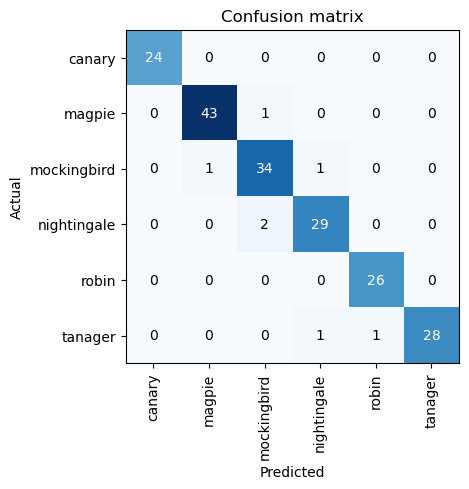

In [ ]:
interpr = ClassificationInterpretation.from_learner(learn)
interpr.plot_confusion_matrix()

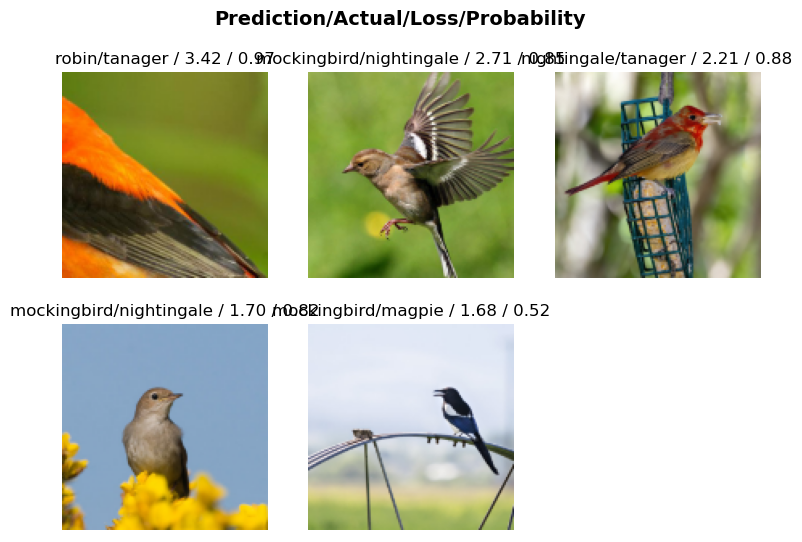

In [ ]:
interpr.plot_top_losses(k=5)